# Initial corpus preprocessing

Preprocessing of Labour speeches dataset.

Output will be paragraphs of speeches rather than sentences.

### Done?:
- import data
- split speeches into individual sentences (these will be the documents)
- tokenise each document
- identify key stop words


In [81]:
# import modules
import numpy as np
from time import time
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import re
import matplotlib.pyplot as plt

% matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\medacola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\medacola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
# import data
df = pd.read_pickle('labour_speeches.pkl')

# show data to check
df.head()

,Speech,Year,Link,Speech_text
0,"Leader's speech, Brighton 2017",2017,http://britishpoliticalspeech.org/speech-archi...,"We meet here this week as a united Party, adva..."
1,"Leader's speech, Liverpool 2016",2016,http://britishpoliticalspeech.org/speech-archi...,Thank you for that introduction. And how brill...
2,"Leader's speech, Brighton 2015",2015,http://britishpoliticalspeech.org/speech-archi...,"Friends, thank you so much for that incredible..."
3,"Leader's speech, Manchester 2014",2014,http://britishpoliticalspeech.org/speech-archi...,It’s great to be at Labour Party Conference in...
4,"Leader's speech, Brighton 2013",2013,http://britishpoliticalspeech.org/speech-archi...,It's great to be in Brighton. And I want to st...


In [55]:
# lets specify a test speech to split
test_text = df['Speech_text'][0]

In [56]:
# lets split it by sentences indicated by full stop
test_text.split('\n')

['We meet here this week as a united Party, advancing in every part of Britain, winning the confidence of millions of our fellow citizens, setting out our ideas and plans for our country’s future, that have already inspired people of all ages and backgrounds.',
 ' And it’s a privilege to be speaking in Brighton.  A city that not only has a long history of hosting Labour conferences, but also of inspirational Labour activists.',
 ' It was over a century ago, here in Brighton, that a teenage shop worker had had enough of the terrible conditions facing her and her workmates. She risked the sack to join the Shop Workers’ Union, after learning about it in a newspaper used to wrap up fish and chips, and was so effective at standing up for women shop workers, she became assistant general secretary before the age of 30.',
 ' In that role she seconded the historic resolution at the Trades Union Congress of 1899  to set up the Labour Representation Committee so that working people would finally 

In [57]:
# how many sentences do we get?
len(test_text.split('\n'))

124

In [58]:
# how many sentences for each speech
for x in df['Speech_text']:
    print(len(x.split('\n')))

124
207
432
162
40
84
570
314
2
5
291
100
46
298
95
271
109
395
202
230
145
58
67
85
56
71
61
61
84
60
78
178
70
77
55
73
51
48
39
49
53
52
60
57
156
134
112
90
152
148
116
96
103
77
101
73
27
18
14
13
13
31
56


In [59]:
# define a function that will break each speech into individual sentences and create a dataframe of those sentences
def sentence_stripper(dataframe):
    i = 1

    sent_no = []
    
    speech_id = []

    para = []
    
    year = []

    for idx in range(len(dataframe['Speech_text'])):
        split_speech = dataframe['Speech_text'][idx].split('\n')
        for line in split_speech:
            sent_no.append(i)
            para.append(line)
            i = i + 1
            speech_id.append(dataframe['Speech'][idx])
            year.append(dataframe['Year'][idx])
                
    
    new_frame = pd.DataFrame({'Sent_id' : sent_no,
                             'Speech' : speech_id,
                             'Paragraph' : para,
                             'Year' : year})
    
    return new_frame

In [60]:
# lets use it
transformed_df = sentence_stripper(df)

# lets check output
transformed_df.head()

,Sent_id,Speech,Paragraph,Year
0,1,"Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"Leader's speech, Brighton 2017",And it’s a privilege to be speaking in Bright...,2017
2,3,"Leader's speech, Brighton 2017","It was over a century ago, here in Brighton, ...",2017
3,4,"Leader's speech, Brighton 2017",In that role she seconded the historic resolu...,2017
4,5,"Leader's speech, Brighton 2017",That became the Labour Party and it was this...,2017


In [61]:
transformed_df.head(-5)

,Sent_id,Speech,Paragraph,Year
0,1,"Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"Leader's speech, Brighton 2017",And it’s a privilege to be speaking in Bright...,2017
2,3,"Leader's speech, Brighton 2017","It was over a century ago, here in Brighton, ...",2017
3,4,"Leader's speech, Brighton 2017",In that role she seconded the historic resolu...,2017
4,5,"Leader's speech, Brighton 2017",That became the Labour Party and it was this...,2017
5,6,"Leader's speech, Brighton 2017",From a Brighton drapery to Downing Street. M...,2017
6,7,"Leader's speech, Brighton 2017","Conference, against all predictions in June w...",2017
7,8,"Leader's speech, Brighton 2017","Yes, we didn’t do quite well enough and we r...",2017
8,9,"Leader's speech, Brighton 2017","Ready to tackle inequality , ready to rebuild...",2017
9,10,"Leader's speech, Brighton 2017",We are ready and the Tories are clearly not. ...,2017


## Preprocessing
Tokenization of sentences and stopword removal

In [62]:
# convert sentences to a list
speech_sent = list(transformed_df['Paragraph'])

# check it
speech_sent[104]

' It means employees given their voice at work, with unions able to represent them properly, freed of undemocratic fetters on their right to organize. I promised you two years ago that we would do politics differently. It’s not always been easy. There’s quite a few who prefer politics the old way. But let me say it again. We will do politics differently. And the vital word there is “we”.'

In [63]:
# preparing stop words as a set
# updated to include laughter mr and heath (classic harold wilson)
stop_words = set(stopwords.words('english'))
stop_words.update(['applause','laughter','mr','heath'])

len(stop_words)

183

In [64]:
# need to tokenise words 
def doc_to_words(sentences):
    for sentence in sentences:
        # use gensim tokenisation system, doc must be string, deaccent function given as true
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    
    
speech_sent_tok = list(doc_to_words(speech_sent))

print(speech_sent_tok[104])

['it', 'means', 'employees', 'given', 'their', 'voice', 'at', 'work', 'with', 'unions', 'able', 'to', 'represent', 'them', 'properly', 'freed', 'of', 'undemocratic', 'fetters', 'on', 'their', 'right', 'to', 'organize', 'promised', 'you', 'two', 'years', 'ago', 'that', 'we', 'would', 'do', 'politics', 'differently', 'it', 'not', 'always', 'been', 'easy', 'there', 'quite', 'few', 'who', 'prefer', 'politics', 'the', 'old', 'way', 'but', 'let', 'me', 'say', 'it', 'again', 'we', 'will', 'do', 'politics', 'differently', 'and', 'the', 'vital', 'word', 'there', 'is', 'we']


In [82]:
# lemmatisation of tokens

lemma = WordNetLemmatizer()

def lem_word(ws):
    # this function takes a list of lists of tokens
    return [[lemma.lemmatize(token) for token in tokens] for tokens in ws]
    
speech_sent_tok = lem_word(speech_sent_tok)

speech_sent_tok[104]

['it',
 'mean',
 'employee',
 'given',
 'their',
 'voice',
 'at',
 'work',
 'with',
 'union',
 'able',
 'to',
 'represent',
 'them',
 'properly',
 'freed',
 'of',
 'undemocratic',
 'fetter',
 'on',
 'their',
 'right',
 'to',
 'organize',
 'promised',
 'you',
 'two',
 'year',
 'ago',
 'that',
 'we',
 'would',
 'do',
 'politics',
 'differently',
 'it',
 'not',
 'always',
 'been',
 'easy',
 'there',
 'quite',
 'few',
 'who',
 'prefer',
 'politics',
 'the',
 'old',
 'way',
 'but',
 'let',
 'me',
 'say',
 'it',
 'again',
 'we',
 'will',
 'do',
 'politics',
 'differently',
 'and',
 'the',
 'vital',
 'word',
 'there',
 'is',
 'we']

In [91]:
lemma.lemmatize('dodged')

'dodged'

In [66]:
# stopword removal

def remove_stopwords(text):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in speech_sent]
 
words = remove_stopwords(speech_sent_tok)
 
print(words[104])

['means', 'employees', 'given', 'voice', 'work', 'unions', 'able', 'represent', 'properly', 'freed', 'undemocratic', 'fetters', 'right', 'organize', 'promised', 'two', 'years', 'ago', 'would', 'politics', 'differently', 'always', 'easy', 'quite', 'prefer', 'politics', 'old', 'way', 'let', 'say', 'politics', 'differently', 'vital', 'word']


In [67]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).

# includes threshold kwarg (threshold score required by bigram)
bigram = gensim.models.phrases.Phrases(words, min_count=10, threshold=100)
trigram = gensim.models.phrases.Phrases(bigram[words], threshold = 100)

for idx in range(len(words)):
    for token in bigram[words[idx]]:
        if '_' in token:
            if token not in words[idx]:
                # Token is a bigram, add to document.
                words[idx].append(token)
    for token in trigram[words[idx]]:
        if '_' in token:
            if token not in words[idx]:
                # Token is a trigram, add to document.
                words[idx].append(token)

C:\Users\medacola\AppData\Local\Continuum\anaconda3\envs\topicmodel1\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [68]:
words[104]

['means',
 'employees',
 'given',
 'voice',
 'work',
 'unions',
 'able',
 'represent',
 'properly',
 'freed',
 'undemocratic',
 'fetters',
 'right',
 'organize',
 'promised',
 'two',
 'years',
 'ago',
 'would',
 'politics',
 'differently',
 'always',
 'easy',
 'quite',
 'prefer',
 'politics',
 'old',
 'way',
 'let',
 'say',
 'politics',
 'differently',
 'vital',
 'word']

Average length: 54.52314107018763 words.


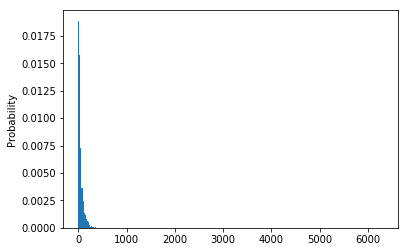

In [69]:
# word per sentence
len_art = [len(x.split(' ')) for x in transformed_df['Paragraph']]

%matplotlib inline
x = np.array(len_art)
plt.hist(x, density=True, bins=500)
plt.ylabel('Probability');

print('Average length: '+ str(np.mean(len_art))+' words.')

[('people', 2014), ('government', 1704), ('britain', 1222), ('labour', 1214), ('country', 1188), ('party', 1145), ('us', 1143), ('new', 1105), ('one', 1067), ('world', 847), ('would', 829), ('years', 805), ('year', 768), ('time', 767), ('every', 722), ('say', 696), ('work', 694), ('must', 681), ('want', 664), ('make', 650), ('know', 633), ('let', 594), ('british', 574), ('change', 549), ('way', 532), ('get', 517), ('last', 513), ('first', 501), ('great', 501), ('economic', 500), ('social', 495), ('right', 493), ('said', 492), ('need', 483), ('policy', 464), ('today', 449), ('public', 444), ('future', 438), ('even', 433), ('take', 432), ('tory', 422), ('going', 420), ('believe', 420), ('many', 414), ('election', 400), ('national', 396), ('see', 388), ('society', 388), ('next', 386), ('power', 381)]


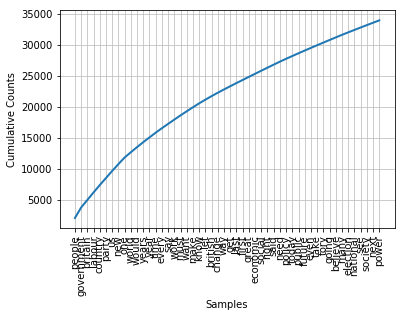

In [70]:
# visualise word frequency
# flatten list of lists into 1D list
flat_list = [item for sublist in words for item in sublist]
# convert text to nltk text object
text = nltk.Text(flat_list)

# frequency of words
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))
fdist.plot(50, cumulative=True)

In [71]:
# combine these tokens into a dataframe
transformed_df.insert(1,'Tokens',words)

In [72]:
# check it looks right
transformed_df.head()

,Sent_id,Tokens,Speech,Paragraph,Year
0,1,"[meet, week, united, party, advancing, every, ...","Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"[privilege, speaking, brighton, city, long, hi...","Leader's speech, Brighton 2017",And it’s a privilege to be speaking in Bright...,2017
2,3,"[century, ago, brighton, teenage, shop, worker...","Leader's speech, Brighton 2017","It was over a century ago, here in Brighton, ...",2017
3,4,"[role, seconded, historic, resolution, trades,...","Leader's speech, Brighton 2017",In that role she seconded the historic resolu...,2017
4,5,"[became, labour, party, woman, margaret, bondf...","Leader's speech, Brighton 2017",That became the Labour Party and it was this...,2017


In [73]:
transformed_df.to_pickle('labour_speeches_para_corpus1.pkl')